In [40]:
# Step 1: Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# Connect to SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [42]:
# create a table named 'sales'
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')


In [43]:
# insert sample data into sales table 
sample_data= [
    ('Apple', 10, 1.5),
    ('orange', 23, 2.5),
    ('Banana', 15, 3.5),
    ('Apple', 14, 1.5),
    ('orange', 20, 2.5),
    ('Banana', 18, 3.5),
    ('Apple', 5, 1.5),
    ('orange', 18, 2.5),
    ('Banana', 7, 3.5),
    ('orange', 3, 2.5),
    ('Banana', 10, 3.5)
]

In [44]:

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()                  
                   

In [45]:
# SQL query to calculate total quantity and total revenue per product
query = '''
SELECT 
     product,
     SUM(quantity) as total_quantity,
     SUM(quantity * price) as revenue
 FROM sales
 GROUP BY product 
 '''
   

In [46]:
# Execute query and load result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

In [47]:
#  Print the DataFrame
print("sales summary:/n")
print(df)

sales summary:/n
  product  total_quantity  revenue
0   Apple              87    130.5
1  Banana             115    402.5
2  banana              35    122.5
3  orange             192    480.0


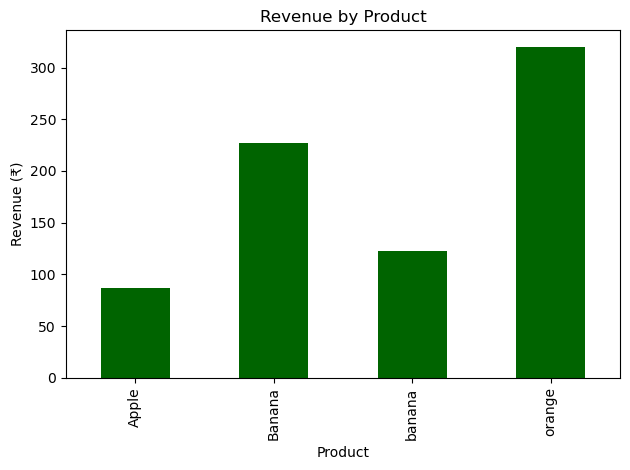

In [35]:
# Plot a bar chart
df.plot(kind='bar', x='product', y='revenue', color='darkgreen', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.tight_layout()

In [48]:
# Save the chart as an image file
plt.savefig('sales_chart.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [37]:
# Close the database connection
conn.close()